In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv('climate_data.txt', delim_whitespace=True, usecols=[0,1], header=None)

In [11]:
df.head(5)

,0,1
0,1850/01,-0.700
1,1850/02,-0.286
2,1850/03,-0.732
3,1850/04,-0.563
4,1850/05,-0.327


In [12]:
df[['year', 'month']]=df[0].str.split('/', expand=True).astype(int)

In [13]:
df=df.rename(columns={1: 'value'})

In [14]:
df = df.drop(df[df['year'] == 2018].index)

In [15]:
gruped=df.groupby(['year', 'month'])

In [16]:
df = df.set_index(['year', 'month'])

In [17]:
gruped.sum()

value
year month       
1850 1     -0.700
     2     -0.286
     3     -0.732
     4     -0.563
     5     -0.327
...           ...
2021 8      0.711
     9      0.681
     10     0.729
     11     0.711
     12     0.651

[2052 rows x 1 columns]

In [18]:
df -= df.loc[1850:1900].mean()
df = df.reset_index()

/tmp/ipykernel_361774/3169460043.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df -= df.loc[1850:1900].mean()


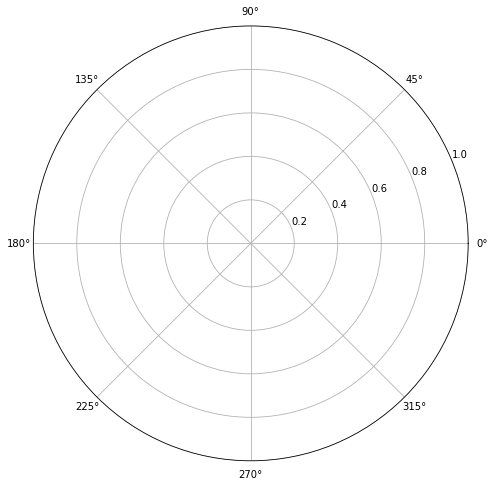

In [19]:
fig = plt.figure(figsize=(8,8))
ax=plt.subplot(111, projection='polar')

In [20]:
df['value'].min()

-0.6605588235294119

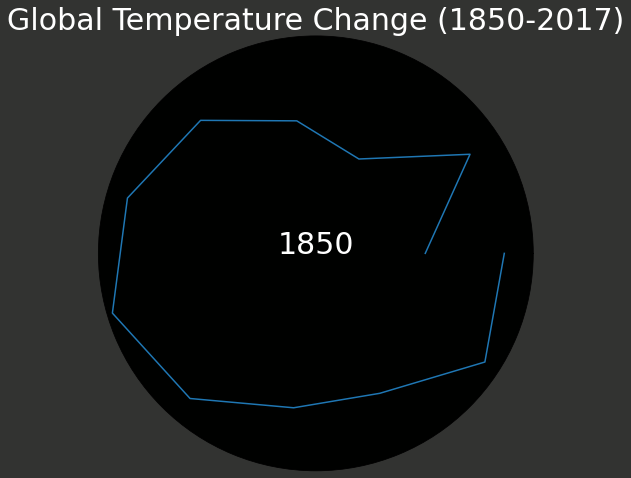

In [21]:
df_1850 = df[df['year']==1850]
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
r = df_1850['value'] + 1
theta = np.linspace(0, 2*np.pi, 12)
ax.plot(theta, r)
ax.axes.get_yaxis().set_ticklabels([])
ax.axes.get_xaxis().set_ticklabels([])
fig.set_facecolor("#323331")
ax.set_facecolor('#000100')
ax.set_title("Global Temperature Change (1850-2017)", color='white', fontdict={'fontsize': 30})
ax.text(0,0,"1850", color='white', size=30, ha='center')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [22]:
df['value'].max()

1.4244411764705882

In [23]:
ax.set_ylim(0, 3.25)

(0.0, 3.25)

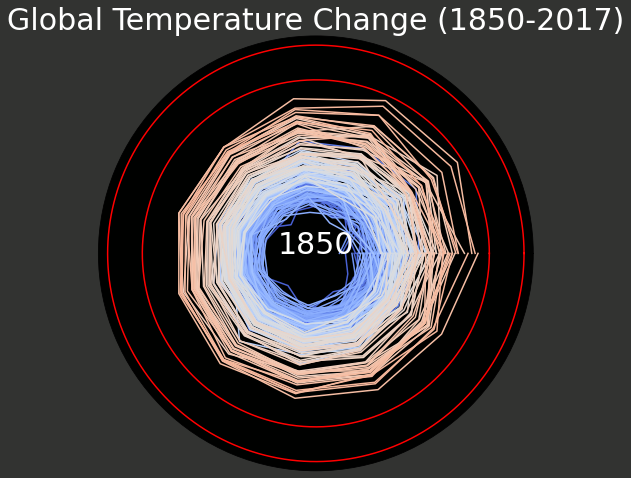

In [26]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')

ax.axes.get_yaxis().set_ticklabels([])
ax.axes.get_xaxis().set_ticklabels([])

fig.set_facecolor("#323331")
ax.set_facecolor('#000100')

ax.set_title("Global Temperature Change (1850-2017)", color='white', fontdict={'fontsize': 30})
ax.text(0,0,"1850", color='white', size=30, ha='center')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

full_circle_thetas = np.linspace(0, 2*np.pi, 1000)
blue_line_one_radii = [1.0]*1000
red_line_one_radii = [2.5]*1000
red_line_two_radii = [3.0]*1000

ax.plot(full_circle_thetas, blue_line_one_radii, c='blue')
ax.plot(full_circle_thetas, red_line_one_radii, c='red')
ax.plot(full_circle_thetas, red_line_two_radii, c='red')

years = df['year'].unique()

for index, year in enumerate(years):
    r = df[df['year'] == year]['value'] + 1
    theta = np.linspace(0, 2*np.pi, 12)
    
    
     # ax1.text(0,0, str(year), color='white', size=30, ha='center')
    ax.plot(theta, r, c=plt.cm.coolwarm(index))
